In [1]:
!nvidia-smi

Mon Oct  3 23:00:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:26:00.0  On |                  N/A |
|  0%   40C    P8    11W / 170W |    448MiB / 12288MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 51, 51, 32)        1

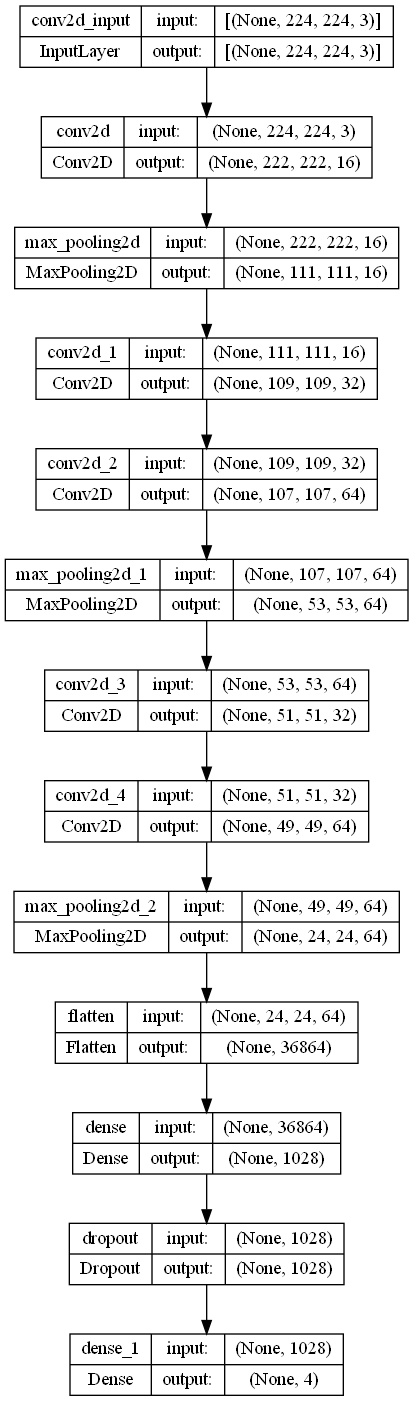

In [3]:
### model

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from glob import glob
from tensorflow.keras.utils import plot_model
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

class_num = 4



model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(1028,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, to_file='BaseModel2.png')

In [4]:
op = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

filepath = r"D:\Visual Disorders\Weights\DIP1.h5"



checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')

log_csv = CSVLogger(r'D:\Visual Disorders\CSV\DIP1.csv', separator=',', append=False)

callbacks_list = [checkpoint1, log_csv]



r = model.fit_generator(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
    

)

Epoch 1/100


C:\Users\USER\AppData\Local\Temp\ipykernel_14940\607247816.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


457/457 [==============================] - ETA: 0s - loss: 1.1430 - accuracy: 0.4923
Epoch 1: val_accuracy improved from -inf to 0.53163, saving model to D:\Visual Disorders\Weights\DIP1.h5
457/457 [==============================] - 40s 73ms/step - loss: 1.1430 - accuracy: 0.4923 - val_loss: 1.1840 - val_accuracy: 0.5316
Epoch 2/100
455/457 [============================>.] - ETA: 0s - loss: 0.8968 - accuracy: 0.6319
Epoch 2: val_accuracy improved from 0.53163 to 0.69265, saving model to D:\Visual Disorders\Weights\DIP1.h5
457/457 [==============================] - 15s 33ms/step - loss: 0.8957 - accuracy: 0.6326 - val_loss: 0.7758 - val_accuracy: 0.6927
Epoch 3/100
456/457 [============================>.] - ETA: 0s - loss: 0.7529 - accuracy: 0.6996
Epoch 3: val_accuracy improved from 0.69265 to 0.74505, saving model to D:\Visual Disorders\Weights\DIP1.h5
457/457 [==============================] - 14s 31ms/step - loss: 0.7521 - accuracy: 0.7000 - val_loss: 0.7054 - val_accuracy: 0.7450
E

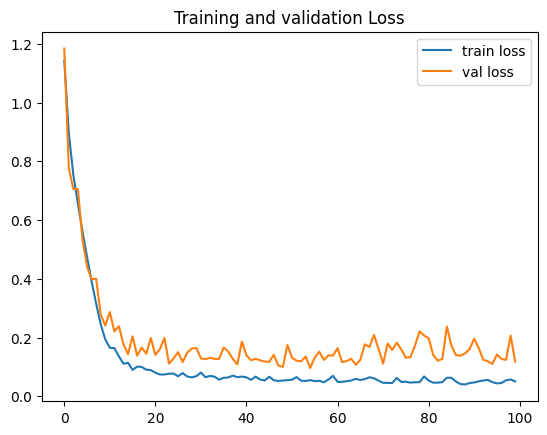

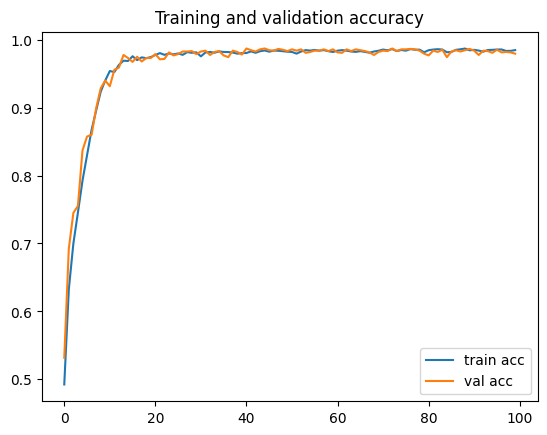

<Figure size 640x480 with 0 Axes>

In [7]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [8]:
model.load_weights(filepath)
Adam = keras.optimizers.Adam(lr=0.001)


preds = model.evaluate_generator(test_set)
print ("Loss = ",float(preds[0]))
print ("Test Accuracy = ",float(preds[1])*100)

C:\Users\USER\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_14940\3381981596.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds = model.evaluate_generator(test_set)


Loss =  0.08450039476156235
Test Accuracy =  99.17250275611877
